# Assignment 2: Naive Bayes and Text Classification

Only use the already imported library `numpy`. Make sure that the `spamham.txt` dataset is in the same directory as the notebook.

List your team members (name and immatriculation number) in the following cell:

Ciheng Zhang, Huipanjun Tian,Gang yu

In [1]:
# Load required packages and dataset. Do not modify.
import numpy as np


def load_spamham_dataset():
    import string
    
    with open('spamham.txt', mode='r', encoding='utf-8') as f:
        rows = [l.strip().split('\t')[:2] for l in f]
    
    y, X = zip(*rows)
    X =[x.translate(str.maketrans('', '', string.punctuation)).lower().split() for x in X]
    
    return X, y
    

X, y = load_spamham_dataset()

print('Sample:')
print(f'{y[0]}: {X[0]}')
print(f'{y[2]}: {X[2]}')

Sample:
ham: ['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
spam: ['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'questionstd', 'txt', 'ratetcs', 'apply', '08452810075over18s']


## Task 2: Spam Classification with Naive Bayes

Check out the description of the dataset at [https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection).

Implement a Naive Bayes classifier with Laplace smoothing to detect whether a text message is spam or ham (not spam).

A text message is represented by a list of string tokens as shown above.
The classification target is binary and the two possible labels are the strings `'spam'` and `'ham'`.

Fill out the methods in `NaiveBayesSpamClassifier` to train (`fit`) and predict (`predict`). Feel free to introduce new fields and methods based on your needs, but the methods `fit` and `predict` are required and their interface should not be changed.

Hint: Try to map the text messages to word frequency vectors by counting how often each word occurs in a message.

In [2]:
# Implement your solution here.


class NaiveBayesSpamClassifier(object):
    def __init__(self):
        self.priors = {}
        self.hamLikehoods = {}
        self.spamLikehoods = {}
        self.word_total = {}
        self.ham_total=0
        self.spam_total=0

    def fit(self, X, y):
        """
        X is a list of `n` text messages. Each text message is a list of strings with at least length one.
        y is a list of `n` labels either the string 'spam' or the string 'ham'.
        """
        ham_word_cnt = {}
        spam_word_cnt = {}
        ham_cnt = 0.0
        spam_cnt = 0.0

        for i in range(0, len(y)):
            if y[i] == "ham":
                ham_cnt += 1
                for j in X[i]:
                    if j not in self.word_total:
                        ham_word_cnt[j] = 1
                        spam_word_cnt[j] = 1
                        self.word_total[j] = 1
                    ham_word_cnt[j] += 1
                    self.ham_total += 1
            if y[i] == "spam":
                spam_cnt += 1
                for j in X[i]:
                    if j not in self.word_total:
                        spam_word_cnt[j] = 1
                        ham_word_cnt[j] = 1
                        self.word_total[j] = 1
                    spam_word_cnt[j] += 1
                    self.spam_total += 1

        self.priors["ham"] = ham_cnt/len(y)
        self.priors["spam"] = spam_cnt/len(y)

        for label in ham_word_cnt:
            self.hamLikehoods[label] = (ham_word_cnt[label]+1)/(self.ham_total+1)
        for label in spam_word_cnt:
            self.spamLikehoods[label] = (spam_word_cnt[label]+1)/(self.spam_total+1)


    def predict(self, X):
        """
        X is a list of `n` text messages. Each text message is a list of strings with at least length one.
        The method returns a list of `n` strings, i.e. classification labels ('spam' or 'ham').
        """
        spamResult = self.priors["spam"]
        hamResult = self.priors["ham"]

        result = [0 for i in range(len(X))]
        for i in range(len(X)):
            for w in self.word_total:
                if w in X[i]:
                    spamResult *= self.spamLikehoods[w]
                    hamResult *= self.hamLikehoods[w]
            result[i] = 'ham' if spamResult < hamResult else 'spam'
            spamResult = self.priors["spam"]
            hamResult = self.priors["ham"]
     
        return result


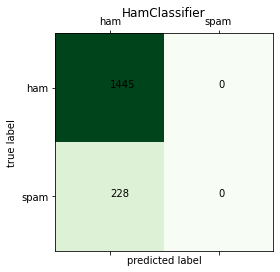

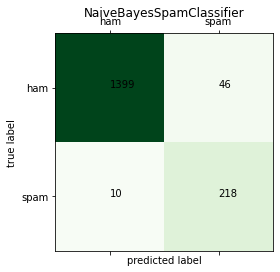

In [3]:
# The following code will evaluate your classifier.
class HamClassifier(object):
    """
    This classifier is a primitive baseline, which just predicts the most common class each time.
    Naive Bayes should definitely beat this.
    """
    def fit(self, X, y): pass
    def predict(self, X): return len(X)*['ham']

    
def train_evaluate(classifier, X, y):
    from sklearn.metrics import confusion_matrix
    from sklearn.model_selection import train_test_split
    
    # Apply train-test split.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)
    # Inititialize and train classifier.
    classifier.fit(X_train, y_train)
    # Evaluate classifier on test data.
    yhat_test = classifier.predict(X_test)
    cmatrix = confusion_matrix(y_test, yhat_test, labels=['ham', 'spam'])
    
    return cmatrix


def plot_confusion_matrix(cmatrix, classifier_name):
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(1, 1)
    ax.matshow(cmatrix, cmap='Greens')
    for x in (0, 1):
        for y in (0, 1):
            ax.text(x, y, cmatrix[y, x])
    ax.set_xlabel('predicted label')
    ax.set_ylabel('true label')
    ax.set_xticklabels(['', 'ham', 'spam'])
    ax.set_yticklabels(['', 'ham', 'spam'])
    ax.set_title(classifier_name)

    
    
ham_classifier = HamClassifier()
your_classifier = NaiveBayesSpamClassifier()
ham_cmatrix = train_evaluate(ham_classifier, X, y)
your_cmatrix = train_evaluate(your_classifier, X, y)

plot_confusion_matrix(ham_cmatrix, 'HamClassifier')
plot_confusion_matrix(your_cmatrix, 'NaiveBayesSpamClassifier')